Linear regression.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1234)

In [3]:
# read data

filepath = '../Data/'
DATA_dict = dict()
num_traj = 40
for i in range(num_traj):
    num = i+41;
    if num >= 10:
        str_num = str(num) # no leading zero
    else:
        str_num = '0'+str(num) # add leading zero
    filename = 'trajdata_'+str_num+'.csv'
    with open(filepath+filename, 'r') as f:
        # remove top row, and store the rest in dictionary
        DATA_dict[i] = np.genfromtxt(f, dtype='f4', delimiter=',', skip_header=1)

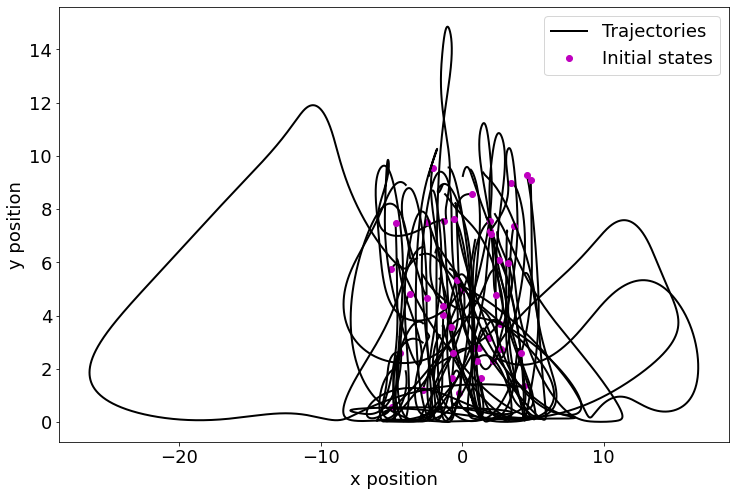

In [4]:
# Plot all position trajectories
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,8))

for i in range(num_traj-1):
    curr_traj = DATA_dict[i]
    plt.plot(curr_traj[:,1],curr_traj[:,2],'k-',linewidth=2) # plot trajectory path
    plt.plot(curr_traj[0,1],curr_traj[0,2],'mo') # plot initial position

# Show legend on last trajectory
curr_traj = DATA_dict[num_traj-1]

plt.plot(curr_traj[:,1],curr_traj[:,2],'k-',label='Trajectories', linewidth=2)
plt.plot(curr_traj[0,1],curr_traj[0,2],'mo',label='Initial states')

plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()
#plt.savefig('all-data.png')

In [5]:
# Add 10% Gaussian noise to data

percentage = 0.10

N = 30
for i in range(N):
    stdd = np.std(DATA_dict[i][:,1:], axis=0)
    for j in range(stdd.shape[0]):
        noise = np.random.normal(0, stdd[j], DATA_dict[i][:,j+1].size) * percentage
        DATA_dict[i][:,j+1] = DATA_dict[i][:,j+1] + noise

## Learn from one trajectory

In [6]:
# We select the trajectory as the training set

idx = 23
X = DATA_dict[idx][:-1,1:9]
Y = DATA_dict[idx][1:,1:7]

In [7]:
reg = LinearRegression().fit(X, Y)

In [8]:
print('The matrix coefficient is\n',reg.coef_)
print('The vector intercept is\n',reg.intercept_)

The matrix coefficient is
 [[ 9.7695154e-01  1.8394403e-02 -7.8380499e-03  2.7592067e-02
  -1.2513392e-03  1.2054877e-02  3.4346431e-04 -9.6552074e-05]
 [ 3.2932259e-02  7.4996662e-01  4.9890289e-01 -1.4974499e-01
   6.5825559e-02 -7.2324648e-02 -4.6765804e-04  1.7829835e-03]
 [-4.5881541e-03  8.6064741e-02  7.7231747e-01  2.2385459e-02
  -7.6871738e-03  2.0519583e-03 -2.9297918e-04 -8.9178607e-04]
 [ 6.4369249e-03 -2.9018536e-02  2.5337279e-02  9.5502204e-01
   1.7432321e-02 -2.5880136e-02 -2.5412813e-04 -1.9516796e-05]
 [-1.0687694e-03  9.8321438e-02 -5.7426181e-02  1.5567490e-01
   8.6543524e-01  1.8622316e-01  2.2341460e-03 -5.2342564e-04]
 [ 7.6296991e-03 -3.7559688e-02 -3.4206929e-03 -7.6801494e-02
   6.0452454e-02  8.9602017e-01 -1.0882597e-03  5.5189058e-04]]
The vector intercept is
 [-0.14801311  0.36252713 -0.02520722  0.09144214 -0.3693648   0.20296745]


In [9]:
# We select the last 10 trajectory as the test set
X_test = np.zeros((0,8))
Y_test = np.zeros((0,6))
M = 10
for i in range(M):
    X_test = np.vstack((X_test,DATA_dict[39-i][:-1,1:9]))
    Y_test = np.vstack((Y_test,DATA_dict[39-i][1:,1:7]))

In [10]:
R2 = reg.score(X_test, Y_test)
print('The R^2 score is', R2)

The R^2 score is 0.9587491854759785


In [11]:
Y_pred = reg.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print('The MSE is',MSE)

The MSE is 0.2610864596907962


In [12]:
X_test_last = DATA_dict[39][:-1,1:9]
Y_test_last = DATA_dict[39][1:,1:7]
Y_pred_s = reg.predict(X_test_last)

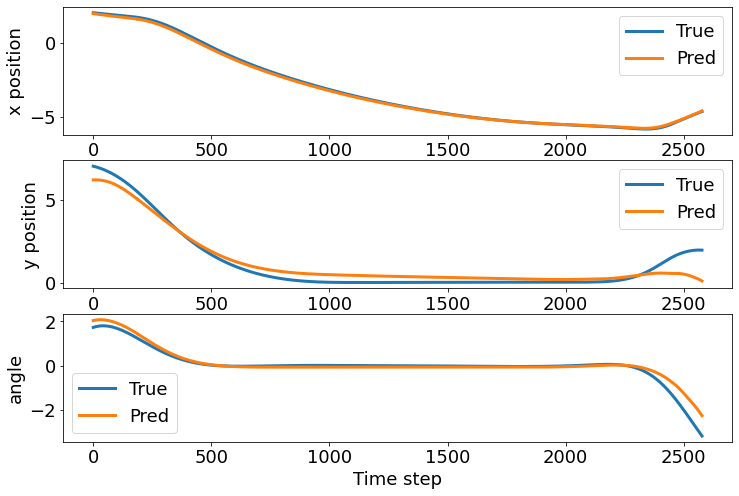

In [14]:
T = range(Y_test_last.shape[0])
fig, axs = plt.subplots(3,figsize=[12,8])
#fig.suptitle('True state v.s. predicted state')
axs[0].plot(T,Y_test_last[:,0], T,Y_pred_s[:,0], linewidth=3)
axs[1].plot(T,Y_test_last[:,1], T,Y_pred_s[:,1], linewidth=3)
axs[2].plot(T,Y_test_last[:,2], T,Y_pred_s[:,2], linewidth=3)
axs[0].set_ylabel('x position')
axs[1].set_ylabel('y position')
axs[2].set_ylabel('angle')
axs[2].set_xlabel('Time step')
axs[0].legend(['True','Pred'])
axs[1].legend(['True','Pred'])
axs[2].legend(['True','Pred'])

In [15]:
fig.savefig('linear-one-traj-learn.png')

## Learn from multiple trajectory

In [16]:
# We select the first 30 trajectory as the training set
X = np.zeros((0,8))
Y = np.zeros((0,6))
N = 30
for i in range(N):
    X = np.vstack((X,DATA_dict[i][:-1,1:9]))
    Y = np.vstack((Y,DATA_dict[i][1:,1:7]))

In [17]:
reg2 = LinearRegression().fit(X, Y)
print('The matrix coefficient is\n',reg2.coef_)
print('The vector intercept is\n',reg2.intercept_)

The matrix coefficient is
 [[ 9.97115183e-01 -4.16068397e-04  1.37097331e-03  2.58013996e-03
  -5.87278270e-04 -2.31716210e-04  9.88474482e-06  1.73967153e-05]
 [-4.00821987e-04  9.92377137e-01  1.88353808e-03  5.36145565e-04
   3.16892767e-03  1.14257166e-03 -6.30800184e-05  1.96636360e-05]
 [ 6.24255805e-04  1.07650085e-03  9.93381768e-01  2.50241465e-04
  -6.74532846e-04  2.86111225e-03  1.59191654e-05 -9.59176250e-05]
 [-7.07032641e-04  2.36680384e-06  7.71094378e-04  9.89526151e-01
   3.74396099e-04  3.28134214e-04 -1.33276239e-04 -1.31070635e-05]
 [-4.71448125e-04 -3.39816497e-04 -8.60427195e-04  9.60090218e-05
   9.89429297e-01 -1.27337222e-03  1.44032987e-04  1.22254504e-05]
 [-1.34233172e-04  6.45165818e-04  3.56457086e-04  4.44959702e-05
  -8.50589689e-04  9.86789643e-01 -3.67574491e-06  3.64949119e-04]]
The vector intercept is
 [-0.00229615  0.03163564  0.0001103   0.01187111 -0.01204247 -0.00076579]


In [18]:
# We select the last 10 trajectory as the test set
X_test = np.zeros((0,8))
Y_test = np.zeros((0,6))
M = 10
for i in range(M):
    X_test = np.vstack((X_test,DATA_dict[39-i][:-1,1:9]))
    Y_test = np.vstack((Y_test,DATA_dict[39-i][1:,1:7]))

In [19]:
R2 = reg2.score(X_test, Y_test)
print('The R^2 score is', R2)

The R^2 score is 0.999925193161955


In [20]:
Y_pred = reg2.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print('The MSE is',MSE)

The MSE is 0.00040769818250632213


In [21]:
X_test_last = DATA_dict[39][:-1,1:9]
Y_test_last = DATA_dict[39][1:,1:7]
Y_pred = reg2.predict(X_test_last)

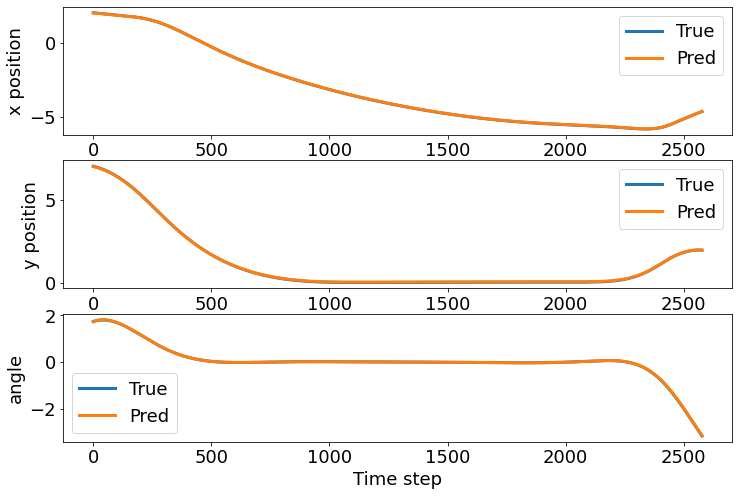

In [22]:
T = range(Y_test_last.shape[0])
fig, axs = plt.subplots(3,figsize=[12,8])
#fig.suptitle('True state v.s. predicted state')
axs[0].plot(T,Y_test_last[:,0], T,Y_pred[:,0], linewidth=3)
axs[1].plot(T,Y_test_last[:,1], T,Y_pred[:,1], linewidth=3)
axs[2].plot(T,Y_test_last[:,2], T,Y_pred[:,2], linewidth=3)
axs[0].set_ylabel('x position')
axs[1].set_ylabel('y position')
axs[2].set_ylabel('angle')
axs[2].set_xlabel('Time step')
axs[0].legend(['True','Pred'])
axs[1].legend(['True','Pred'])
axs[2].legend(['True','Pred'])

In [23]:
fig.savefig('linear-multi-traj-learn.png')

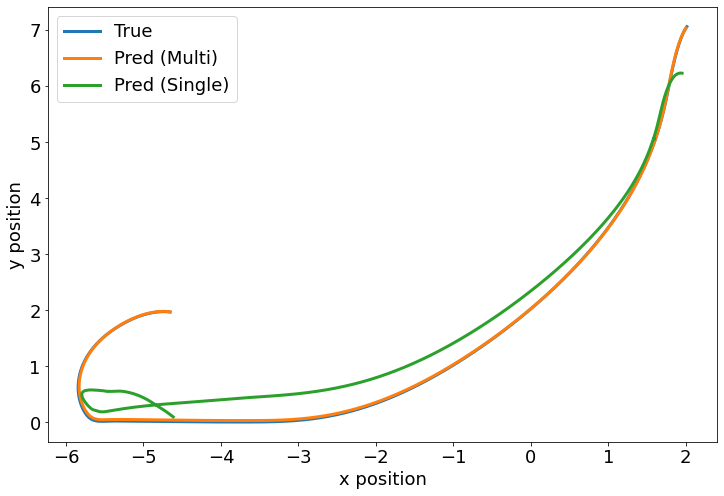

In [24]:
fig, axs = plt.subplots(1,figsize=[12,8])
#fig.suptitle('True state v.s. predicted state')
axs.plot(Y_test_last[:,0],Y_test_last[:,1], Y_pred[:,0], Y_pred[:,1], Y_pred_s[:,0], Y_pred_s[:,1], linewidth=3)
axs.set_xlabel('x position')
axs.set_ylabel('y position')
axs.legend(['True','Pred (Multi)','Pred (Single)'])

In [25]:
fig.savefig('linear-compare.png')